In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
try:
    df = pd.read_csv("output.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Please ensure the file is in the correct directory.")
    exit()



Dataset loaded successfully.


C:\Users\zainm\AppData\Local\Temp\ipykernel_63444\1854206658.py:2: DtypeWarning: Columns (11,26,30,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output.csv")


In [3]:
df.head()

,PatientAge,PatientHasPosGp,PartenerHasPosGp,bmi,conception,Number of Previous Childbirths after 28 Weeks,History of Ruptured Uterus,Number of Abortions (Births before 28 Weeks),Interval from Last Pregnancy (in years),Previous history of Intrauterine Growth Restriction (IUGR),...,Postnatal_Examination__swelling of body,Postnatal_Examination__swelling of face,Postnatal_Examination__swollen left leg,Postnatal_Examination__temp more than 100.6,Postnatal_Examination__temp.100.6 f,Postnatal_Examination__temp.100.6f,Postnatal_Examination__temp100.6f,Postnatal_Examination__temperature is 100.6f or 97f,Postnatal_Examination__tender right/left leg,Postnatal_Examination__tenderness in calf muscles
0,25.0,A-,B-,24.0,Spontaneous,1,No,1,More than 1 year,Yes,...,0,0,0,0,0,0,0,0,0,0
1,18.0,AB+,O-,24.9,Spontaneous,1,No,2,more than 1 year,Yes,...,0,0,0,0,0,0,0,0,0,0
2,24.0,A-,O-,30.0,Spontaneous,5,No,5,More than 1 Year,No,...,0,0,0,0,0,0,0,0,0,0
3,24.0,A-,O-,30.0,Spontaneous,5,No,5,More than 1 Year,No,...,0,0,0,0,0,0,0,0,0,0
4,24.0,A-,O-,30.0,Spontaneous,5,No,5,More than 1 Year,No,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_columns = [
    'PatientAge', 'PatientHasPosGp', 'PartenerHasPosGp', 'bmi', 'conception',
    'First degree relative with following medical conditions', 'PreviouslyDiagnosedMedicalConditions',
    'Number of Previous Childbirths after 28 Weeks', 'Outcome of Previous Pregnancies (Select all that apply):',
    'Mode of Delivery in Previous Pregnancies', 'History of Ruptured Uterus',
    'Number of Abortions (Births before 28 Weeks)', 'Interval from Last Pregnancy (in years)',
    'Previous history of Intrauterine Growth Restriction (IUGR)',
    'Any other Antenatal, Postnatal, or Delivery Complications both fetal and maternal',
    'If responded "Yes" in previous question, then please specify',
    'Gestational Age (GA) (in weeks)', 'Labor Pains currently',
    'Watery Vaginal Discharge currently', 'Bleeding/Spotting currently',
    'Reduced Fetal Movement (FM) currently', 'Mental Health Symptoms',
    'Other Symptoms (Select all that apply)',
    'Medicines in Use currently',
    'Previous Medicines Record (used for long term or frequently taken):',
    'Number of Cesarean Sections (C-sections)',
    'Number of ERPC (Evacuation of Retained Products of Conception)',
    'Previous history of PPH (Postpartum Hemorrhage) Exploration',
    'Any Anesthesia Complication previously',
    'Pallor', 'Jaundice', 'Thyroid enlarged', 'Edema', 'Coarse facial hair',
    'Systolic B.P', 'Diastolic BP', 'Pulse in full 1 minute',
    'Respiratory rate in full 1 minute', 'Temp. ( armpit for 2 ) in *F',
    'Per abdominal examination : Fundal height in weeks',
    'Per abdominal examination: Lie', 'Per abdominal examination: Presentation',
    'Per speculum examination',
    'Per speculum examination (If Yes, specify findings)',
    'Per vaginal examination',
    'Per vaginal examination (If Yes, specify findings)',
    'History of any abdominal or pelvic surgery',
    'Any Uterine Surgery previously (Other than Cesarean Section)'
]

target_column = 'Mode_of_delivery2'

In [ ]:
required_columns = training_columns + [target_column]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing from the dataset: {missing_columns}")
    exit()

Error: The following required columns are missing from the dataset: ["PreviouslyDiagnosedMedicalConditions__von willebrand's diseaseNumber of Previous Childbirths after 28 Weeks", 'Per abdominal examination: Presentation__Any Other']


: 

In [ ]:
# --- Data Preprocessing and Visualization ---

print("\n--- Initial Data Exploration ---")
print(f"Total number of rows: {df.shape[0]}")
print("\nUnique values per column:")
for col in training_columns:
    print(f"  {col}: {df[col].nunique()} unique values")
# Print unique values for the single target column
print(f"  {target_column}: {df[target_column].nunique()} unique values")

In [7]:
# Drop rows with missing values in the target column first
print("\nDropping rows with missing target values...")
initial_rows = df.shape[0]
df.dropna(subset=[target_column], inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows with missing target values.")
print(f"Remaining rows: {rows_after_drop}")


Dropping rows with missing target values...
Dropped 0 rows with missing target values.
Remaining rows: 10558


In [8]:
# Set the minimum threshold for classes to be included
min_sample_threshold = 10

In [9]:
# Get the value counts of the target variable
class_counts = df[target_column].value_counts()
print("\nInitial class distribution of the target variable:")
print(class_counts)


Initial class distribution of the target variable:
Mode_of_delivery2
Not delivered yet                                           3876
Vaginal                                                     2183
Cesarean Section                                            1645
Not Delivered Yet                                            862
ERPC                                                         467
Vaginal and ERPC                                             231
IOL and Vaginal                                              184
Suction Evacuation                                           175
Laparotomy                                                   175
Suction Evacuation and Chemotherapy                          125
Methotrexate                                                  97
Hysterotomy                                                   93
Not Delivered Yet and Cervical Cerclage                       77
Induced Abortion                                              68
Medical Termination 

In [10]:
classes_to_sample = class_counts[class_counts >= min_sample_threshold].index
print(f"\nFound {len(classes_to_sample)} classes with a count >= 10:")
print(list(classes_to_sample))


Found 23 classes with a count >= 10:
['Not delivered yet', 'Vaginal', 'Cesarean Section', 'Not Delivered Yet', 'ERPC', 'Vaginal and ERPC', 'IOL and Vaginal', 'Suction Evacuation', 'Laparotomy', 'Suction Evacuation and Chemotherapy', 'Methotrexate', 'Hysterotomy', 'Not Delivered Yet and Cervical Cerclage', 'Induced Abortion', 'Medical Termination of Pregnancy and Vaginal', 'cesarean section', 'Not Delivered Yet and ECV', 'Cesarean section', 'IOL and Cesarean Section', 'Laparoscopy', 'Laparotomy and Repair of Uterus', 'Laparotomy and Peripartum Hysterectomy and ICU Admission', 'ECV and Vaginal']


In [11]:
balanced_df = pd.DataFrame()

# Sample from each of the selected classes
if not classes_to_sample.empty:
    for cls in classes_to_sample:
        # Take ALL samples from this class (no sampling)
        class_samples = df[df[target_column] == cls]
        balanced_df = pd.concat([balanced_df, class_samples], ignore_index=True)

    print(f"\nSuccessfully created a balanced dataset with {balanced_df.shape[0]} samples.")
    # Update the main dataframe to the new, balanced one
    df = balanced_df
else:
    print("\nNo classes found with a count >= 10. Skipping class balancing.")


Successfully created a balanced dataset with 10543 samples.


In [12]:
df.shape

(10543, 893)

In [13]:
# Drop rows with any missing feature values after filtering and sampling
print("\nDropping rows with missing feature values from the new dataset...")
initial_rows = df.shape[0]
df.dropna(subset=training_columns, inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows with missing feature values.")
print(f"Remaining rows: {rows_after_drop}")


Dropping rows with missing feature values from the new dataset...
Dropped 0 rows with missing feature values.
Remaining rows: 10543


In [14]:
X = df[training_columns]
y = df[target_column]

In [15]:
print(f"\nFinal shape of training data (X): {X.shape}")
print(f"Final shape of target data (y): {y.shape}")


Final shape of training data (X): (10543, 651)
Final shape of target data (y): (10543,)


In [16]:
# Handle inconsistencies in target column
print(f"\nBefore cleaning target column: {y.nunique()} unique values")
# Convert to string, lowercase, and remove leading/trailing whitespace
y = y.astype(str).str.lower().str.strip()
print(f"After cleaning target column: {y.nunique()} unique values")
print("New unique values in target column:")
print(y.unique())



Before cleaning target column: 23 unique values
After cleaning target column: 20 unique values
New unique values in target column:
['not delivered yet' 'vaginal' 'cesarean section' 'erpc'
 'vaginal and erpc' 'iol and vaginal' 'suction evacuation' 'laparotomy'
 'suction evacuation and chemotherapy' 'methotrexate' 'hysterotomy'
 'not delivered yet and cervical cerclage' 'induced abortion'
 'medical termination of pregnancy and vaginal'
 'not delivered yet and ecv' 'iol and cesarean section' 'laparoscopy'
 'laparotomy and repair of uterus'
 'laparotomy and peripartum hysterectomy and icu admission'
 'ecv and vaginal']


In [17]:
# Final check of y distribution
final_y_counts = y.value_counts()
print(f"\nFinal y distribution:")
print(final_y_counts)



Final y distribution:
Mode_of_delivery2
not delivered yet                                           4738
vaginal                                                     2183
cesarean section                                            1726
erpc                                                         467
vaginal and erpc                                             231
iol and vaginal                                              184
suction evacuation                                           175
laparotomy                                                   175
suction evacuation and chemotherapy                          125
methotrexate                                                  97
hysterotomy                                                   93
not delivered yet and cervical cerclage                       77
induced abortion                                              68
medical termination of pregnancy and vaginal                  51
not delivered yet and ecv                        

In [18]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

In [19]:
for col in categorical_features:
    X.loc[:, col] = X[col].astype(str).str.lower()

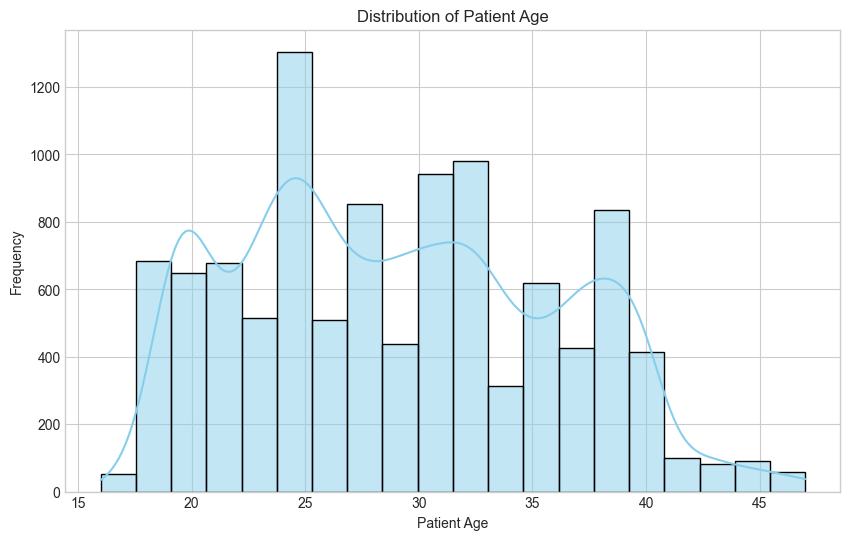

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')

# Plot distribution of a numerical feature (e.g., PatientAge)
plt.figure(figsize=(10, 6))
sns.histplot(X['PatientAge'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\zainm\AppData\Local\Temp\ipykernel_63284\1859532491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, palette='viridis', order=y.value_counts().index)


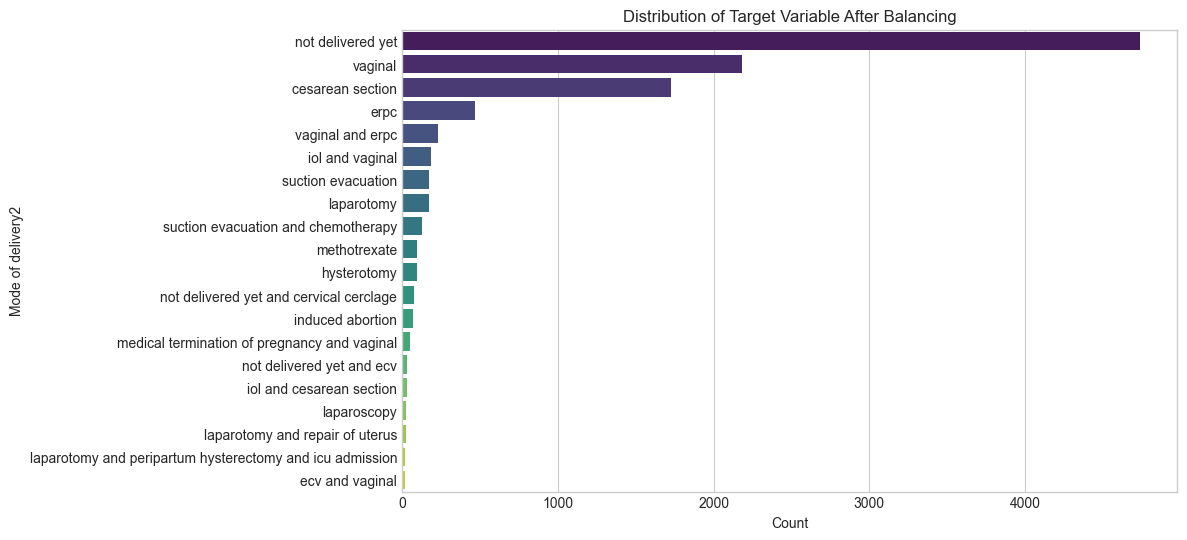

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y=y, palette='viridis', order=y.value_counts().index)
plt.title('Distribution of Target Variable After Balancing')
plt.xlabel('Count')
plt.ylabel('Mode of delivery2')
plt.show()

In [22]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("\nData split into training and testing sets.")


Data split into training and testing sets.


In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
pipelines = {} # Dictionary to store trained pipelines


Starting model training and evaluation...

Training Logistic Regression...
Logistic Regression Accuracy: 0.8141
Classification Report for Logistic Regression:
                                                          precision    recall  f1-score   support

                                        cesarean section       0.69      0.64      0.66       518
                                         ecv and vaginal       0.60      0.60      0.60         5
                                                    erpc       0.65      0.68      0.66       140
                                             hysterotomy       0.70      0.57      0.63        28
                                        induced abortion       1.00      1.00      1.00        20
                                iol and cesarean section       1.00      0.89      0.94         9
                                         iol and vaginal       0.87      0.84      0.85        55
                                             laparoscop

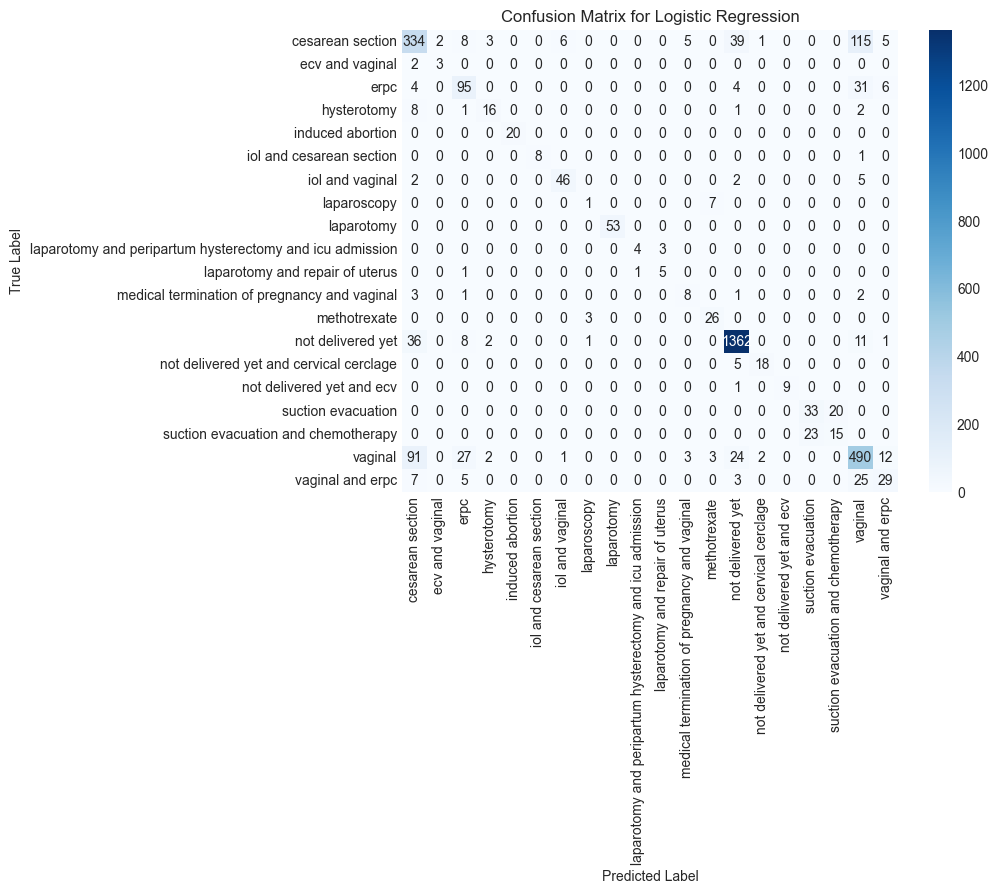


Training Random Forest...
Random Forest Accuracy: 0.8381
Classification Report for Random Forest:
                                                          precision    recall  f1-score   support

                                        cesarean section       0.69      0.77      0.73       518
                                         ecv and vaginal       0.00      0.00      0.00         5
                                                    erpc       0.74      0.70      0.72       140
                                             hysterotomy       1.00      0.25      0.40        28
                                        induced abortion       1.00      1.00      1.00        20
                                iol and cesarean section       1.00      0.78      0.88         9
                                         iol and vaginal       0.88      0.80      0.84        55
                                             laparoscopy       0.00      0.00      0.00         8
                  

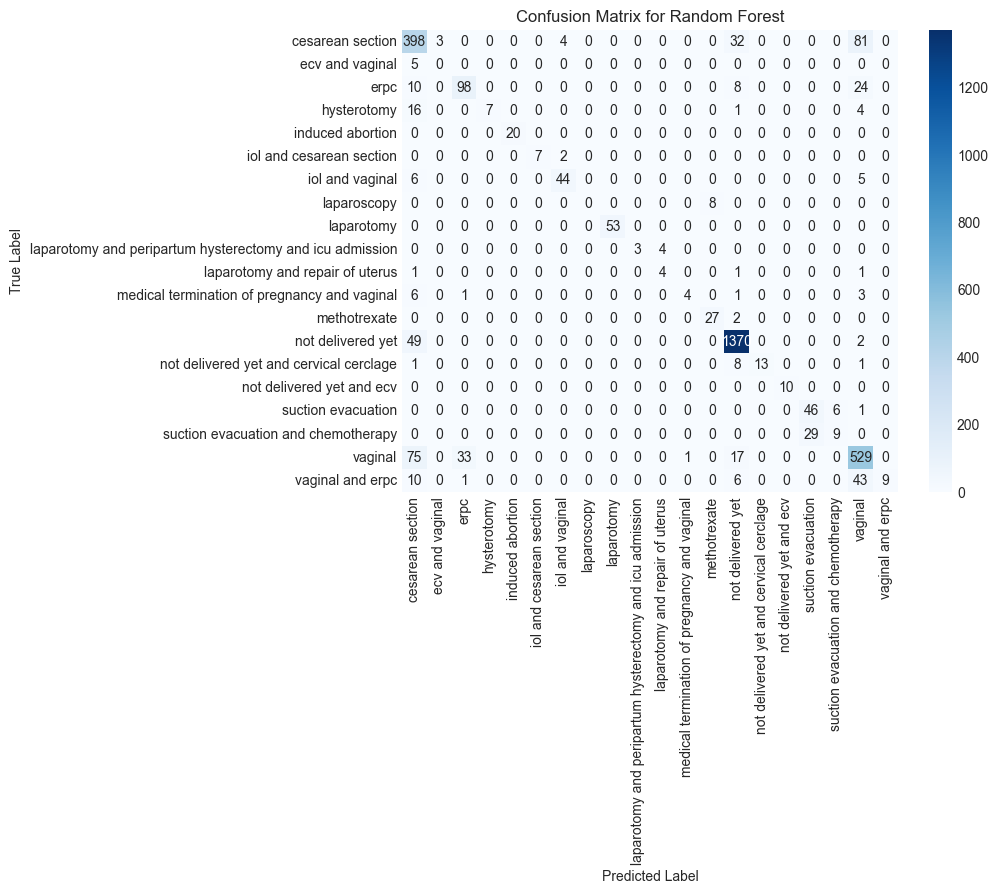


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8438
Classification Report for Gradient Boosting:
                                                          precision    recall  f1-score   support

                                        cesarean section       0.76      0.70      0.73       518
                                         ecv and vaginal       0.80      0.80      0.80         5
                                                    erpc       0.79      0.79      0.79       140
                                             hysterotomy       0.68      0.54      0.60        28
                                        induced abortion       1.00      1.00      1.00        20
                                iol and cesarean section       1.00      0.78      0.88         9
                                         iol and vaginal       0.89      0.73      0.80        55
                                             laparoscopy       0.17      0.25      0.20         8
      

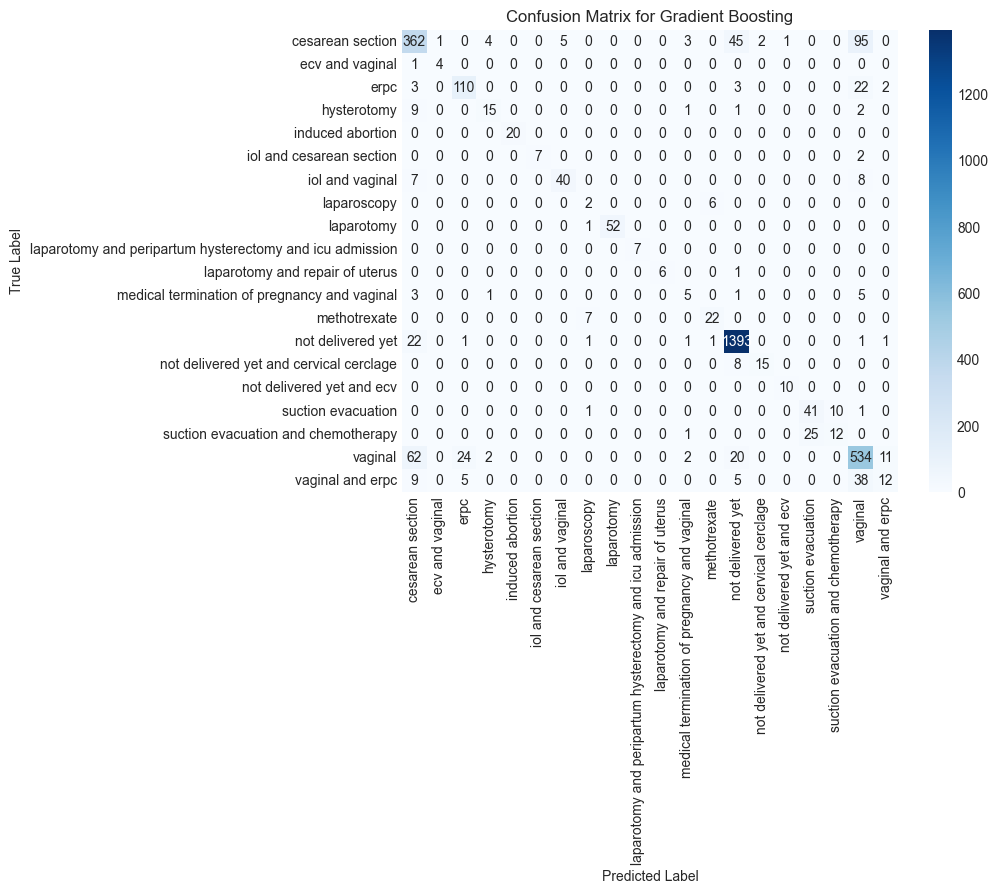

In [25]:
print("\nStarting model training and evaluation...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create a full pipeline with the preprocessor and the model
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
    
    # Train the model
    full_pipeline.fit(X_train, y_train)
    
    # Store the trained pipeline
    pipelines[name] = full_pipeline
    
    # Make predictions
    y_pred = full_pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{report}")
    
    # Optional: Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

C:\Users\zainm\AppData\Local\Temp\ipykernel_63284\3829775270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='deep')


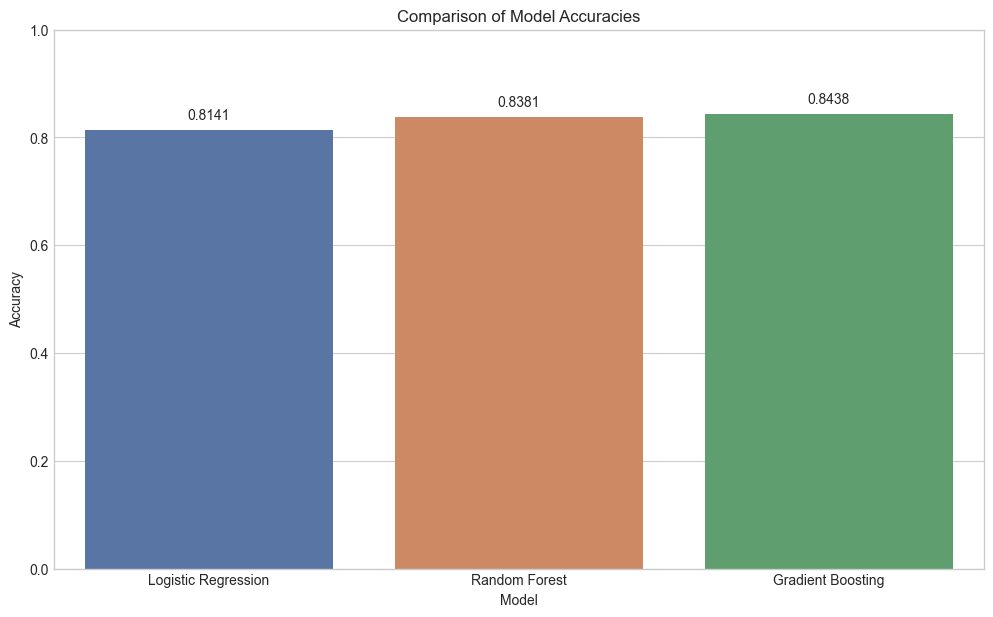

In [26]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 7))
sns.barplot(x=model_names, y=accuracies, palette='deep')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
plt.show()

In [27]:
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
best_pipeline = pipelines[best_model_name]

print(f"\n--- Final Result ---")
print(f"The best performing model is: {best_model_name}")
print(f"With an accuracy of: {best_model_accuracy:.4f}")


--- Final Result ---
The best performing model is: Gradient Boosting
With an accuracy of: 0.8438


In [28]:
model_filename = 'best_delivery_prediction_model.joblib'
try:
    joblib.dump(best_pipeline, model_filename)
    print(f"\nBest model saved to {model_filename}")
except Exception as e:
    print(f"\nError saving the model: {e}")


Best model saved to best_delivery_prediction_model.joblib
